# Cosmic Watch Data Analysis

# Introduction
This code is at the begining stages, the goal is to create an analysis tool for cosmic watch data that is code based and readable to give students a place to start and the ability to read and change the code so the code is not another black box for the cosmic watch.

In [1]:
# imports some software packages we'll use
import pandas as pd #Pandas lets us name the columns of our data more likea spread sheet.
import numpy as np #Numpy is used by pandas for calculatiions
%matplotlib inline
import matplotlib as mpl #For ploting data
import matplotlib.pyplot as plt #For typing less when poloting data
import math #for other math we might do.

inline_rc = dict(mpl.rcParams) #Sets Parameters for plots.


data = pd.read_csv('https://raw.githubusercontent.com/dkallenberg/Quarknet-CosmicWatch-ipynb/main/CW_A_Data2023_Jul_10.csv')

data

,Event,RunTime,ADC,SiPM,DownTime,Temp
0,1,6451,399,87.30,1483,26.05
1,2,13640,355,68.30,2777,26.05
2,3,14714,480,130.21,2964,26.05
3,4,21895,608,202.86,4266,26.05
4,5,25540,433,104.37,5015,26.05
...,...,...,...,...,...,...
9402,9403,81949268,377,76.28,15309391,27.67
9403,9404,81954456,361,70.62,15310329,27.67
9404,9405,81955533,403,88.99,15310520,27.67
9405,9406,81977392,402,87.25,15314636,27.67


In [2]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Event,9407.0,4.704000e+03,2.715711e+03,1.00,2352.50,4704.00,7055.50,9407.00
RunTime,9407.0,4.101485e+07,2.359158e+07,6451.00,20611046.00,41278543.00,61441499.00,81987520.00
ADC,9407.0,3.873056e+02,1.088548e+02,49.00,344.00,385.00,441.00,937.00
SiPM,9407.0,9.348283e+01,6.590819e+01,15.48,64.67,80.11,109.25,1487.84
DownTime,9407.0,7.649537e+06,4.408907e+06,1483.00,3834028.50,7691250.00,11467547.50,15316511.00
Temp,9407.0,2.797544e+01,4.450347e-01,26.05,27.67,28.31,28.31,28.31


Next we are going to plot a hystogram of the event voltages, in part to see that the data was importated correctly, and also to see how it compares to other data sets.

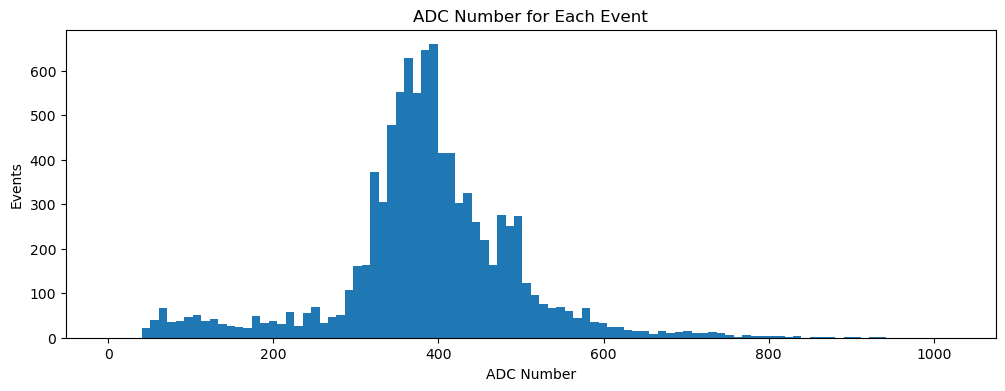

In [3]:
# This makes a histogram of that totally useless calculation above
plt.figure(figsize=(12,4))
plt.hist(data.ADC, bins=100, range=[0,1024], log=False)
plt.title("ADC Number for Each Event")
plt.xlabel("ADC Number")
plt.ylabel("Events");

It takes time for the CosmicWatch's processor to evaluate and report on events, this time is considered down time. The system reports out the down time, we need to use this to calculate the up time, the time when the Cosmic Watch was waiting for a hit. Using the up time we can calculate a rate for every event.

In [4]:
data['UpTime'] = (data.RunTime - data.DownTime)
data['Time'] = pd.to_timedelta(data.UpTime, unit='ms')
data['Minute']= (data.UpTime/(60000))
data.Minute = (data.Minute).astype(int)
data['avgRate'] = data.Event/(data.UpTime/1000)
data

,Event,RunTime,ADC,SiPM,DownTime,Temp,UpTime,Time,Minute,avgRate
0,1,6451,399,87.30,1483,26.05,4968,0 days 00:00:04.968000,0,0.201288
1,2,13640,355,68.30,2777,26.05,10863,0 days 00:00:10.863000,0,0.184111
2,3,14714,480,130.21,2964,26.05,11750,0 days 00:00:11.750000,0,0.255319
3,4,21895,608,202.86,4266,26.05,17629,0 days 00:00:17.629000,0,0.226899
4,5,25540,433,104.37,5015,26.05,20525,0 days 00:00:20.525000,0,0.243605
...,...,...,...,...,...,...,...,...,...,...
9402,9403,81949268,377,76.28,15309391,27.67,66639877,0 days 18:30:39.877000,1110,0.141102
9403,9404,81954456,361,70.62,15310329,27.67,66644127,0 days 18:30:44.127000,1110,0.141108
9404,9405,81955533,403,88.99,15310520,27.67,66645013,0 days 18:30:45.013000,1110,0.141121
9405,9406,81977392,402,87.25,15314636,27.67,66662756,0 days 18:31:02.756000,1111,0.141098


In [5]:
Data1Min = data.drop_duplicates(subset=['Minute'], keep='first')
Data1Min = Data1Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,6451,1483,4968,0 days 00:00:04.968000,0,0.201288
15,16,74392,14107,60285,0 days 00:01:00.285000,1,0.265406
27,28,157564,29500,128064,0 days 00:02:08.064000,2,0.218641
36,37,230616,43084,187532,0 days 00:03:07.532000,3,0.197300
41,42,303916,56669,247247,0 days 00:04:07.247000,4,0.169871
...,...,...,...,...,...,...,...
9378,9379,81683893,15259474,66424419,0 days 18:27:04.419000,1107,0.141198
9381,9382,81753974,15272654,66481320,0 days 18:28:01.320000,1108,0.141122
9388,9389,81832185,15287443,66544742,0 days 18:29:04.742000,1109,0.141093
9397,9398,81910354,15302073,66608281,0 days 18:30:08.281000,1110,0.141094


In [6]:
Data1Min['DeltaCount'] = Data1Min.Event - Data1Min.Event.shift(1)

Data1Min['DeltaUpTime'] = Data1Min.UpTime - Data1Min.UpTime.shift(1)

Data1Min['Rate'] = Data1Min.DeltaCount / (Data1Min.DeltaUpTime /1000)
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,6451,1483,4968,0 days 00:00:04.968000,0,0.201288,NaN,NaN,NaN
15,16,74392,14107,60285,0 days 00:01:00.285000,1,0.265406,15.0,55317.0,0.271164
27,28,157564,29500,128064,0 days 00:02:08.064000,2,0.218641,12.0,67779.0,0.177046
36,37,230616,43084,187532,0 days 00:03:07.532000,3,0.197300,9.0,59468.0,0.151342
41,42,303916,56669,247247,0 days 00:04:07.247000,4,0.169871,5.0,59715.0,0.083731
...,...,...,...,...,...,...,...,...,...,...
9378,9379,81683893,15259474,66424419,0 days 18:27:04.419000,1107,0.141198,11.0,60711.0,0.181186
9381,9382,81753974,15272654,66481320,0 days 18:28:01.320000,1108,0.141122,3.0,56901.0,0.052723
9388,9389,81832185,15287443,66544742,0 days 18:29:04.742000,1109,0.141093,7.0,63422.0,0.110372
9397,9398,81910354,15302073,66608281,0 days 18:30:08.281000,1110,0.141094,9.0,63539.0,0.141645


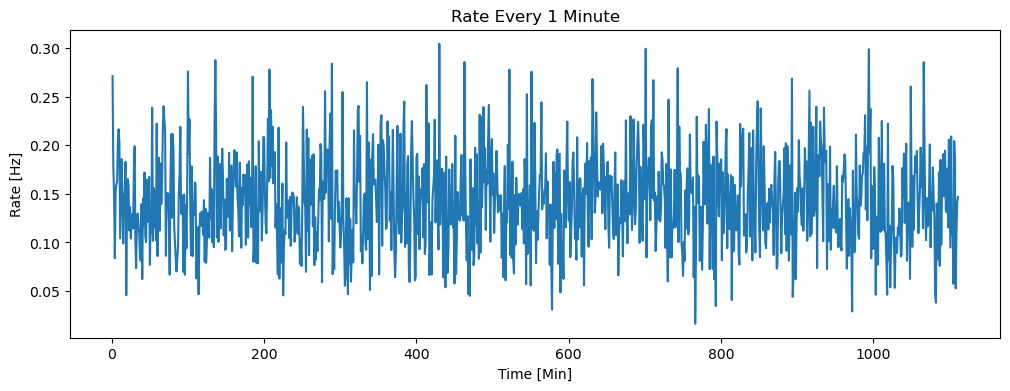

In [7]:
plt.figure(figsize=(12,4))
plt.plot(Data1Min.Minute,Data1Min.Rate)
plt.title("Rate Every 1 Minute")
plt.xlabel("Time [Min]")
plt.ylabel("Rate [Hz]");

In [8]:
#Data5Min = pd.DataFrame(columns=['Event','DownTime','Uptime','Minute'])
Data5Min = Data1Min.query('Minute % 5 == 0')

Data5Min = Data5Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,6451,1483,4968,0 days 00:00:04.968000,0,0.201288
50,51,376585,70243,306342,0 days 00:05:06.342000,5,0.166481
105,106,737540,137339,600201,0 days 00:10:00.201000,10,0.176608
146,147,1105733,205640,900093,0 days 00:15:00.093000,15,0.163316
184,185,1481820,275369,1206451,0 days 00:20:06.451000,20,0.153342
...,...,...,...,...,...,...,...
9227,9228,80435790,15025635,65410155,0 days 18:10:10.155000,1090,0.141079
9274,9275,80793305,15092830,65700475,0 days 18:15:00.475000,1095,0.141171
9321,9322,81162437,15162038,66000399,0 days 18:20:00.399000,1100,0.141242
9358,9359,81554930,15235256,66319674,0 days 18:25:19.674000,1105,0.141120


In [9]:
Data5Min['DeltaCount'] = Data5Min.Event - Data5Min.Event.shift(1)
Data5Min['DeltaUpTime'] = Data5Min.UpTime - Data5Min.UpTime.shift(1)
Data5Min['Rate'] = Data5Min.DeltaCount / (Data5Min.DeltaUpTime /1000)


Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,6451,1483,4968,0 days 00:00:04.968000,0,0.201288,NaN,NaN,NaN
50,51,376585,70243,306342,0 days 00:05:06.342000,5,0.166481,50.0,301374.0,0.165907
105,106,737540,137339,600201,0 days 00:10:00.201000,10,0.176608,55.0,293859.0,0.187165
146,147,1105733,205640,900093,0 days 00:15:00.093000,15,0.163316,41.0,299892.0,0.136716
184,185,1481820,275369,1206451,0 days 00:20:06.451000,20,0.153342,38.0,306358.0,0.124038
...,...,...,...,...,...,...,...,...,...,...
9227,9228,80435790,15025635,65410155,0 days 18:10:10.155000,1090,0.141079,43.0,303324.0,0.141763
9274,9275,80793305,15092830,65700475,0 days 18:15:00.475000,1095,0.141171,47.0,290320.0,0.161890
9321,9322,81162437,15162038,66000399,0 days 18:20:00.399000,1100,0.141242,47.0,299924.0,0.156706
9358,9359,81554930,15235256,66319674,0 days 18:25:19.674000,1105,0.141120,37.0,319275.0,0.115888


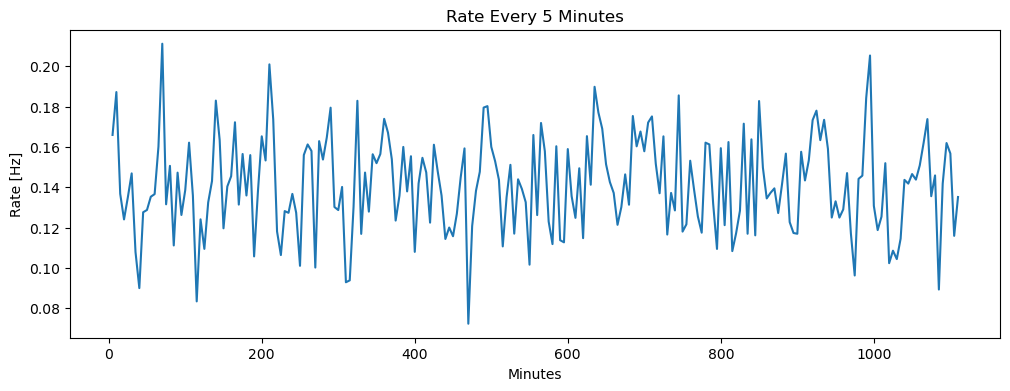

In [10]:
plt.figure(figsize=(12,4))
plt.plot(Data5Min.Minute,Data5Min.Rate)
plt.title("Rate Every 5 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");

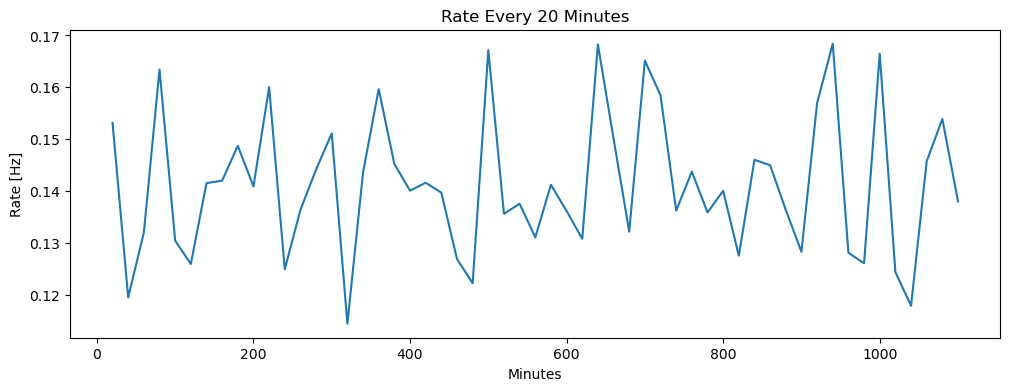

In [11]:
Data20Min = Data1Min.query('Minute % 20 == 0')

Data20Min = Data20Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data20Min['DeltaCount'] = Data20Min.Event - Data20Min.Event.shift(1)

Data20Min['DeltaUpTime'] = Data20Min.UpTime - Data20Min.UpTime.shift(1)

Data20Min['Rate'] = Data20Min.DeltaCount / (Data20Min.DeltaUpTime /1000)

plt.figure(figsize=(12,4))
plt.plot(Data20Min.Minute,Data20Min.Rate)
plt.title("Rate Every 20 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");